- Nama : Marsell Stefen Lontaan
- Nim : 202201022
- Kelas : A  
- Dataset : Karyawan Mengundurkan Diri
- Tujuan : Memprediksi karyawan yang akan mundur diri berdasarkan jam kerja dan usia
- Sumber Data : Dummy

In [1]:
# Run 1: Mengimpor semua library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Run 2: Membaca dataset dari file CSV
dataset = pd.read_csv('Karyawan_Mengundurkan_Diri.csv')
dataset.head()  # Menampilkan 5 baris pertama

,JamKerjaPerMinggu,StatusPernikahan,Gaji,Usia,MengundurkanDiri
0,52,Lajang,Rendah,24,Ya
1,45,Menikah,Sedang,35,Tidak
2,38,Lajang,Sedang,29,Ya
3,60,Lajang,Tinggi,33,Ya
4,40,Menikah,Tinggi,41,Tidak


In [3]:
# Run 3: Mengubah nilai kategorikal menjadi numerik
le_status = LabelEncoder()
le_gaji = LabelEncoder()
le_target = LabelEncoder()

dataset['StatusPernikahan'] = le_status.fit_transform(dataset['StatusPernikahan'])
dataset['Gaji'] = le_gaji.fit_transform(dataset['Gaji'])
dataset['MengundurkanDiri'] = le_target.fit_transform(dataset['MengundurkanDiri'])

dataset.head()

,JamKerjaPerMinggu,StatusPernikahan,Gaji,Usia,MengundurkanDiri
0,52,0,0,24,1
1,45,1,1,35,0
2,38,0,1,29,1
3,60,0,2,33,1
4,40,1,2,41,0


In [4]:
# Run 4: Memisahkan fitur (X) dan label (y)
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali target
y = dataset.iloc[:, -1].values   # Kolom target (MengundurkanDiri)

In [5]:
# Run 5: Membagi data ke dalam training (75%) dan testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
# Run 6: Menstandarisasi fitur agar skala seragam
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Run 7: Melatih model klasifikasi menggunakan Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [8]:
# Run 8: Mengukur performa model
y_pred = model.predict(X_test)

# Confusion Matrix & Akurasi
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[ 7  1]
 [ 0 17]]
Akurasi Model: 96.00%


<ipython-input-14-59bdb4a31a4b>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_vis[y_vis == j, 0], X_vis[y_vis == j, 1],


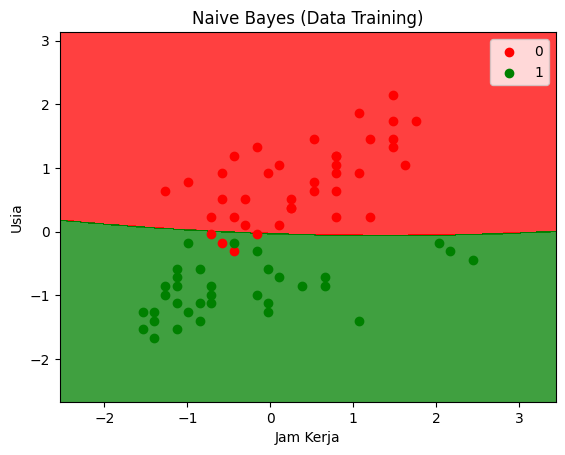

In [14]:
# Run 9: Visualisasi Decision Boundary untuk data training
X_vis = X_train[:, [0, 3]]  # Gunakan fitur: JamKerja dan Usia
y_vis = y_train

X1, X2 = np.meshgrid(
    np.arange(start = X_vis[:, 0].min() - 1, stop = X_vis[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_vis[:, 1].min() - 1, stop = X_vis[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel(),
                                             np.zeros_like(X1.ravel()),  # dummy kolom lain
                                             X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_vis)):
    plt.scatter(X_vis[y_vis == j, 0], X_vis[y_vis == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Data Training)')
plt.xlabel('Jam Kerja')
plt.ylabel('Usia')
plt.legend()
plt.show()

<ipython-input-13-4402fb6bb750>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_vis[y_vis == j, 0], X_vis[y_vis == j, 1],


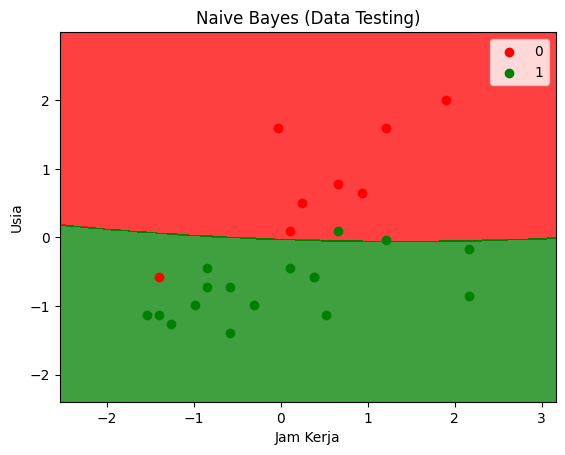

In [13]:
# Run 10: Visualisasi Decision Boundary untuk data testing
X_vis = X_test[:, [0, 3]]
y_vis = y_test

X1, X2 = np.meshgrid(
    np.arange(start = X_vis[:, 0].min() - 1, stop = X_vis[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_vis[:, 1].min() - 1, stop = X_vis[:, 1].max() + 1, step = 0.01)
)

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel(),
                                             np.zeros_like(X1.ravel()),
                                             X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_vis)):
    plt.scatter(X_vis[y_vis == j, 0], X_vis[y_vis == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Naive Bayes (Data Testing)')
plt.xlabel('Jam Kerja')
plt.ylabel('Usia')
plt.legend()
plt.show()